In [84]:
# 텍스트 크기 설정
from keras.models import Model # 모델 클래스 임포트
from keras import layers
from keras import Input # Input 클래스 임포트

text1_max_words = 10000 # text1의 단어 크기
text2_max_words = 10000 # text2의 단어 크기
answer_max_words = 500 # answer의 단어 크기

In [85]:
# 특성수 open (maxlen == input_length)
# shape= None 가변길이의 input
text1_input = Input(shape=(None,), dtype='int32', name='text1') # name = 관리 용이
# text1_max_words : 사용되는 단어의 종류, text1_input : 출력 노드 지정
# 단어의 의미를 알게 해주는
embedded_text1 = layers.Embedding(text1_max_words, 64)(text1_input)
# LSTM 순환 신경망
encoded_text1 = layers.LSTM(32)(embedded_text1)
# Input() 으로 입력층을 형성하고, 임베딩 층과 순환신경망 층을 연결

In [86]:
text2_input = Input(shape=(None,), dtype='int32', name='text2') # name = 관리 용이
embedded_text2 = layers.Embedding(text2_max_words, 32)(text2_input)
encoded_text2 = layers.LSTM(16)(embedded_text2)

In [87]:
concatenated = layers.Concatenate(axis=-1)([encoded_text1, encoded_text2])

In [88]:
import numpy as np
a = np.arange(10).reshape(2, 5)
print("a", a, "\n")

a [[0 1 2 3 4]
 [5 6 7 8 9]] 



In [89]:
b = np.arange(20, 32).reshape(2, 6)
print("b", b, "\n")

b [[20 21 22 23 24 25]
 [26 27 28 29 30 31]] 



In [90]:
import tensorflow as tf
print("axis=1", tf.keras.layers.Concatenate(axis=1)([a, b]))

axis=1 tf.Tensor(
[[ 0  1  2  3  4 20 21 22 23 24 25]
 [ 5  6  7  8  9 26 27 28 29 30 31]], shape=(2, 11), dtype=int64)


In [91]:
answer = layers.Dense(answer_max_words, activation='softmax')(concatenated)

In [92]:
model = Model(inputs=[text1_input, text2_input], outputs=answer)
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['acc'])

In [93]:
model.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 text1 (InputLayer)          [(None, None)]               0         []                            
                                                                                                  
 text2 (InputLayer)          [(None, None)]               0         []                            
                                                                                                  
 embedding_7 (Embedding)     (None, None, 64)             640000    ['text1[0][0]']               
                                                                                                  
 embedding_8 (Embedding)     (None, None, 32)             320000    ['text2[0][0]']               
                                                                                            

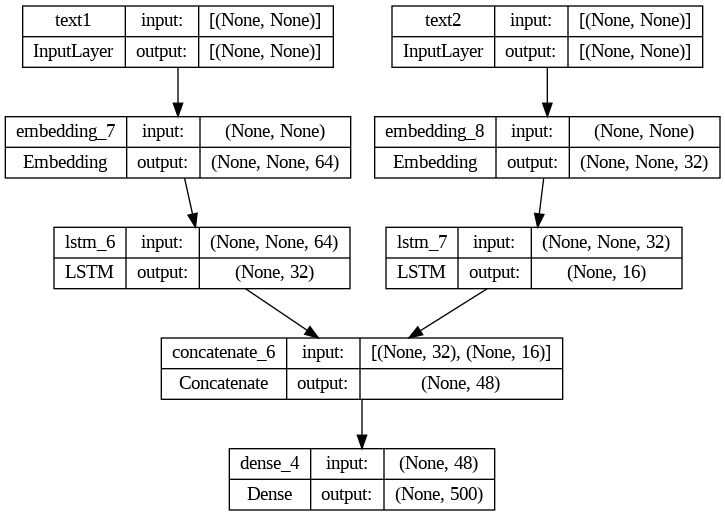

In [94]:
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes=True, show_layer_names=True)

In [95]:
import numpy as np
from keras.utils import to_categorical

num_samples = 1000
max_len = 100

In [96]:
text1 = np.random.randint(low=0, high=text1_max_words, size=(num_samples, max_len))
text2 = np.random.randint(low=0, high=text2_max_words, size=(num_samples, max_len))

In [97]:
text1

array([[5478, 9447, 6099, ..., 7067,  164, 3015],
       [8422, 8289, 3007, ..., 7620, 5821, 1783],
       [8569, 2402,    4, ...,   82, 1314, 8455],
       ...,
       [1098, 7654, 5485, ..., 9191,  510, 2379],
       [2140, 8237, 5592, ..., 7428, 4150, 8404],
       [7806, 9146, 4766, ..., 2503, 2651, 8760]])

In [98]:
answers = np.random.randint(low=0, high=answer_max_words, size=num_samples)
len(answers)

1000

In [99]:
answers = to_categorical(answers)
answers

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [100]:
len(answers[0])

500

In [101]:
model.fit({'text1':text1, 'text2':text2}, answers, epochs=3, batch_size=129)

Epoch 1/3


Exception ignored in: <function _xla_gc_callback at 0x7bbb4dca2a70>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/jax/_src/lib/__init__.py", line 98, in _xla_gc_callback
    def _xla_gc_callback(*args):
KeyboardInterrupt: 


8/8 [==============================] - 59s 156ms/step - loss: 6.2147 - acc: 0.0010
Epoch 2/3
8/8 [==============================] - 1s 178ms/step - loss: 6.2097 - acc: 0.0030
Epoch 3/3
8/8 [==============================] - 1s 148ms/step - loss: 6.2060 - acc: 0.0060


In [102]:
prediction = model.predict({'text1':text1, 'text2':text2})
prediction

32/32 [==============================] - 1s 16ms/step


array([[0.00202491, 0.00204074, 0.00198209, ..., 0.00201537, 0.00201691,
        0.00199569],
       [0.00202912, 0.00205192, 0.00199145, ..., 0.0020102 , 0.00200116,
        0.00199877],
       [0.00203595, 0.002028  , 0.00199291, ..., 0.0020164 , 0.00200504,
        0.00198112],
       ...,
       [0.00203581, 0.00202983, 0.00197916, ..., 0.00202326, 0.00200994,
        0.0020014 ],
       [0.00203469, 0.00203856, 0.00199207, ..., 0.0020134 , 0.00200435,
        0.00199638],
       [0.00204078, 0.00202328, 0.00198507, ..., 0.00201555, 0.0020206 ,
        0.00199306]], dtype=float32)

In [103]:
len(prediction[0])

500

In [104]:
label = np.argmax(prediction[0])
print(label)

409


In [105]:
prediction[0][310]

0.001909668

In [106]:
prediction[0][320]

0.0019589856

### 다중 출력 모델

In [107]:
from keras import layers
from keras import Input
from keras.models import Model
max_words = 10000 # 사용되는 어휘는 10,000개
num_income_groups = 10 # 소득 수준 그룹은 총 10단계

In [108]:
posts_input = Input(shape=(None,), dtype='int32', name='posts')

In [109]:
x = layers.Embedding(max_words, 256)(posts_input) #(input_dim, output_dim, input_length(생략가능))
x = layers.Conv1D(filters=128, kernel_size=5, activation='relu')(x)
x = layers.MaxPooling1D(pool_size=5)(x)
x = layers.Conv1D(filters=256, kernel_size=5, activation='relu')(x)
x = layers.Conv1D(filters=256, kernel_size=5, activation='relu')(x)
x = layers.MaxPooling1D(pool_size=5)(x)
x = layers.Conv1D(filters=256, kernel_size=2, activation='relu')(x)
x = layers.GlobalMaxPooling1D()(x)
x = layers.Dense(128, activation='relu')(x)
"""
GlobalMaxPooling1D는 입력된 행의 값 중 가장 큰 값 하나를 사용한다 (별도의 pool_size가 없음)
따라서 각 채널에서 최댓값 하나만 남게 되어 차원을 줄이는 효과가 있다 (예: (batch_size, 256, 32) → (batch_size, 32)
Flatten과는 다르다. Flatten은 batch_size를 제외하고는 항상 한 개의 차원만 남기며, 셀의 수는 보존된다 (위의 경우 batch_size, 256x32)
"""

'\nGlobalMaxPooling1D는 입력된 행의 값 중 가장 큰 값 하나를 사용한다 (별도의 pool_size가 없음)\n따라서 각 채널에서 최댓값 하나만 남게 되어 차원을 줄이는 효과가 있다 (예: (batch_size, 256, 32) → (batch_size, 32)\nFlatten과는 다르다. Flatten은 batch_size를 제외하고는 항상 한 개의 차원만 남기며, 셀의 수는 보존된다 (위의 경우 batch_size, 256x32)\n'

In [110]:
# 출력값이 3개이므로, 출력층도 3개를 만들어야 한다
# 앞 단계의 모듈 x를 아래 세 개의 출력층에 각각 연결하여 예측값을 얻는다
# 출력층 생성

# 연령 예측
pred_age = layers.Dense(1, name='age')(x) # 다중 출력의 경우에는 출력층 모듈에 이름을 넣어준다
# 소득 수준 분류
pred_income = layers.Dense(num_income_groups, activation='softmax', name='income')(x)

# 성별 예측
pred_gender = layers.Dense(1, activation='sigmoid', name='gender')(x)

In [111]:
# 하나의 input과 여러 개의 output을 갖는 모델 객체를 생성한다
model = Model(posts_input, [pred_age, pred_income, pred_gender])

In [112]:
model.compile(optimizer='rmsprop',
                loss={
                    'age':'mse',
                    'income':'sparse_categorical_crossentropy',
                    'gender':'binary_crossentropy'
                }
              )
#model.compile(optimizer='rmsprop', loss=['mse', 'sparse_categorical_crossentropy','binary_crossentropy'])
"""
출력이 3개이므로 손실값 설정도 3개 각각 설정해야 함
특히 연령은 회귀 모델, 소득은 다중 분류, 성별은 이진 분류로 훈련 방식이 서로 다름
손실값 설정 시 다중 입력에서와 마찬가지로 출력층 모듈에 이름을 붙였다면 딕셔너리 형태로 구성 가능
"""

'\n출력이 3개이므로 손실값 설정도 3개 각각 설정해야 함\n특히 연령은 회귀 모델, 소득은 다중 분류, 성별은 이진 분류로 훈련 방식이 서로 다름\n손실값 설정 시 다중 입력에서와 마찬가지로 출력층 모듈에 이름을 붙였다면 딕셔너리 형태로 구성 가능\n'

In [113]:
model.summary()

Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 posts (InputLayer)          [(None, None)]               0         []                            
                                                                                                  
 embedding_9 (Embedding)     (None, None, 256)            2560000   ['posts[0][0]']               
                                                                                                  
 conv1d_4 (Conv1D)           (None, None, 128)            163968    ['embedding_9[0][0]']         
                                                                                                  
 max_pooling1d_2 (MaxPoolin  (None, None, 128)            0         ['conv1d_4[0][0]']            
 g1D)                                                                                       

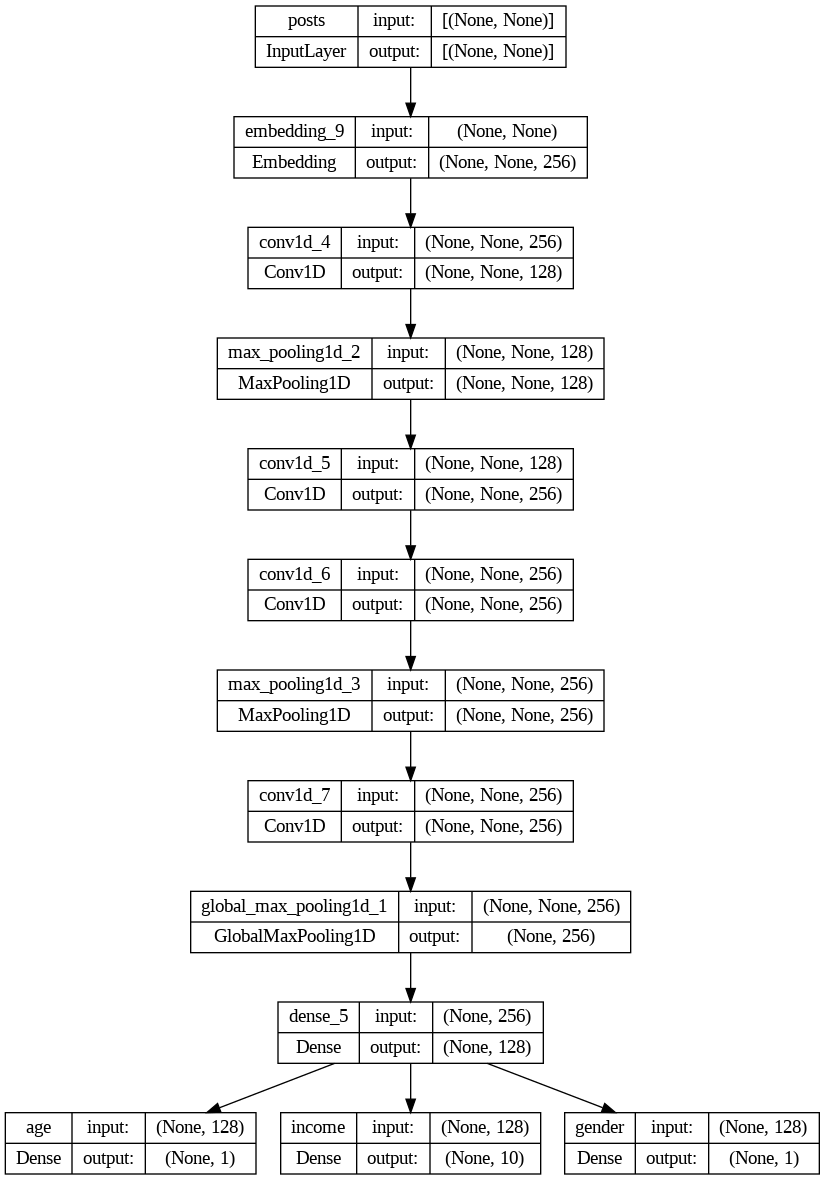

In [115]:
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes=True, show_layer_names=True)